# Importing libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import regex as re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
import plotly.express as px
from ctypes import wintypes


# notebook settings 
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', None)
settings :  { "notebook.output.textLineLimit": 9999 }

In [2]:
df = pd.read_csv('pre-processed_new.csv')

df.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,Winner,title_bout,weight_class,gender,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_Stance,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Stance,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,B_match_weightclass_rank,R_match_weightclass_rank,better_rank,finish,finish_round,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,encoded_better_rank,weight_diff,win_by_decision_diff,B_fights_fought,B_win_percent,B_loss_percent,R_fights_fought,R_win_percent,R_loss_percent,diff_wins+percent,diff_loss_percent,diff_fights_fought,days from current date
0,Eric Schafer,Jason Brilz,140.0,-160,140.000000,62.500000,Blue,False,Light Heavyweight,MALE,0,0,1,1,0,Orthodox,0,0,0,1,2,Orthodox,0,0,0,-1,2,-1,0,0,-2,-10.16,-10.16,-2,16.000000,-0.666667,0.833333,NaN,NaN,neither,U-DEC,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0,-20,-1,3,1.0,0.0,6,0.0,0.0,-1.0,0.0,3,4615
1,Brandon Vera,Jon Jones,215.0,-235,215.000000,42.553191,Blue,False,Light Heavyweight,MALE,0,0,2,0,1,Orthodox,0,0,2,4,1,Orthodox,0,0,-1,-4,3,-14,0,-4,0,2.54,20.32,10,8.272727,0.159091,1.954545,NaN,NaN,neither,KO/TKO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,25,0,4,1.0,0.0,11,1.0,0.0,0.0,0.0,7,4615
2,Junior Dos Santos,Gabriel Gonzaga,-250.0,230,40.000000,230.000000,Red,False,Heavyweight,MALE,0,0,0,5,2,Orthodox,0,0,0,4,0,Orthodox,0,-3,0,3,-3,10,1,1,2,-5.08,-2.54,-4,-12.050000,0.700000,1.200000,NaN,NaN,neither,KO/TKO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,-4,0,10,1.0,0.0,4,1.0,0.0,0.0,0.0,-6,4615
3,Alessio Sakara,James Irvin,-120.0,100,83.333333,100.000000,Red,False,Middleweight,MALE,0,0,0,3,0,Orthodox,0,1,1,3,0,Orthodox,-1,-2,0,-1,1,-5,0,0,0,5.08,7.62,-3,-15.550000,0.125000,-1.000000,NaN,NaN,neither,KO/TKO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,-20,2,8,0.0,0.0,10,0.0,0.0,0.0,0.0,2,4615
4,Mike Pierce,Julio Paulino,-420.0,335,23.809524,335.000000,Red,False,Welterweight,MALE,0,0,0,0,0,Orthodox,0,0,1,0,0,Orthodox,1,0,-1,-1,1,-6,0,0,0,10.16,7.62,-5,-40.500000,0.000000,-3.500000,NaN,NaN,neither,U-DEC,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0.0,0.0,2,0.0,0.0,0.0,0.0,2,4615


In [208]:
# fillna match_weightclass_rank

# for null values >2013 null values will be replaced with rank 16 as they are most likely brand new fighters with no weight class ranking
# for null values before they either need to be dropped or included in the model as they are true nulls since there is not data on them
# for models that can handle nulls I'll include the columns with some data cleaning, but for models that don't have nulls ill drop




In [3]:
# drop fighters

df.drop(['R_fighter','B_fighter'],axis=1,inplace=True)

# EDA 

In [4]:
df.describe()

,R_odds,B_odds,R_ev,B_ev,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,B_match_weightclass_rank,R_match_weightclass_rank,finish_round,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,encoded_better_rank,weight_diff,win_by_decision_diff,B_fights_fought,B_win_percent,B_loss_percent,R_fights_fought,R_win_percent,R_loss_percent,diff_wins+percent,diff_loss_percent,diff_fights_fought,days from current date
count,4538.000000,4539.000000,4538.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,790.000000,1202.000000,3927.000000,3821.000000,3808.000000,3589.000000,3577.000000,3589.000000,3576.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000,4539.000000
mean,-117.605553,65.640229,94.601874,166.547600,0.013659,0.241243,0.923331,0.879269,0.563120,0.024675,0.354043,1.408240,1.348094,0.833223,0.097158,-0.184622,-0.752368,-1.368804,0.337960,-5.088125,-0.274289,-0.468826,-0.270104,0.021172,-0.262412,0.298965,-3.694229,-0.063034,-0.210209,8.336709,6.922629,2.414057,294.095001,414.601103,836.545277,1055.214425,517.899136,652.522092,0.532716,0.437762,0.608724,4.298083,0.459132,0.208196,6.324741,0.604538,0.171403,0.145406,-0.036792,2.026658,2281.445252
std,267.862385,246.955440,82.452264,136.364516,0.117968,0.549217,1.464981,1.614708,1.205492,0.157965,0.654182,1.791743,2.006930,1.466893,0.979309,1.682571,1.995680,3.904903,2.744744,16.439217,1.492120,1.944035,1.730323,7.040320,9.505267,5.185567,22.606399,0.867129,1.721720,4.240315,4.646523,0.991398,230.361088,304.652550,548.162720,626.734296,413.558169,460.338676,0.875439,9.501910,2.214435,5.095900,0.498382,0.406062,6.149585,0.489003,0.376903,0.545431,0.494317,6.162372,1158.844533
min,-1700.000000,-1200.000000,5.882353,8.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,-13.000000,-12.000000,-28.000000,-18.000000,-448.000000,-14.000000,-21.000000,-13.000000,-187.960000,-187.960000,-17.000000,-118.000000,-8.300000,-11.000000,1.000000,0.000000,1.000000,-440.000000,-200.000000,-370.000000,-1250.000000,-550.000000,-275.000000,0.000000,-75.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-27.000000,402.000000
25%,-250.000000,-145.000000,40.000000,68.965517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-2.000000,-3.000000,-1.000000,-11.000000,0.000000,-1.000000,-1.000000,-5.080000,-5.080000,-3.000000,-14.636243,-0.440000,-1.000000,5.000000,3.000000,1.000000,167.000000,225.000000,430.000000,585.000000,242.000000,325.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1277.000000
50%,-150.000000,130.000000,66.666667,130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.750000,0.000000,0.000000,9.000000,7.000000,3.000000,250.000000,347.500000,701.000000,950.000000,439.000000,550.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2236.000000
75%,125.000000,220.000000,125.000000,220.000000,0.000000,0.000000,1.000000,1.00

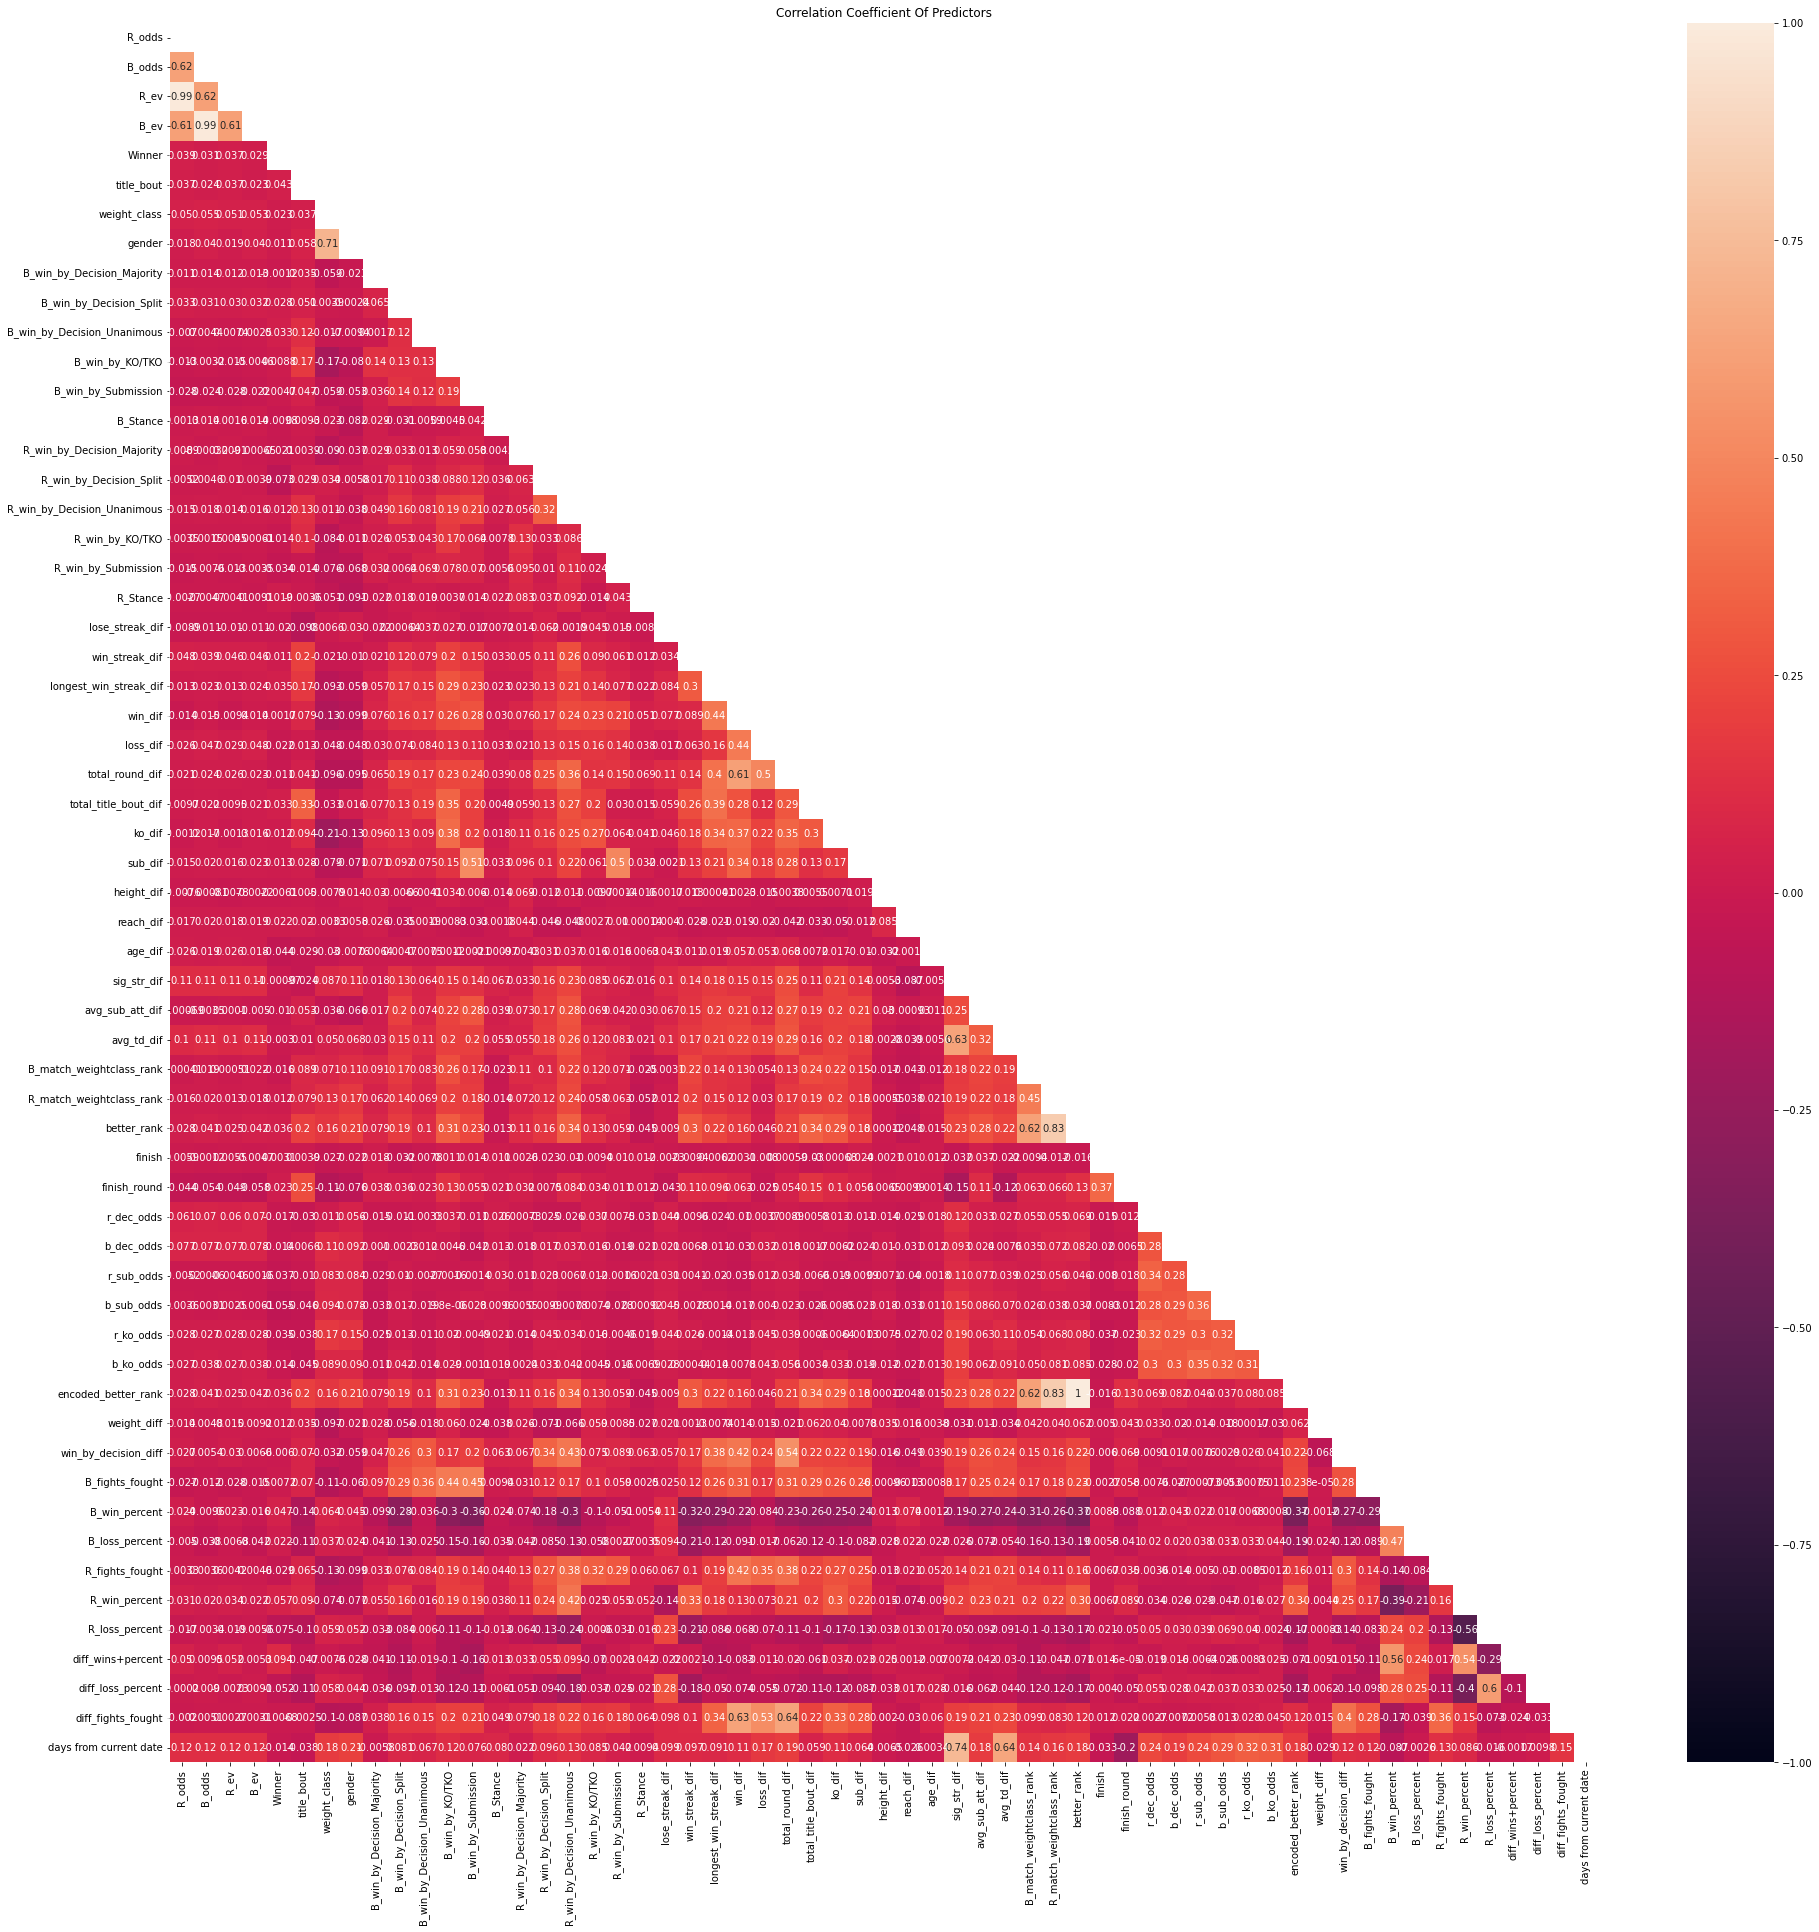

In [5]:
# correlation

# set figure size
plt.figure(figsize=(32,32))

# generate correlation
# use .factorize() to turn categorical variables into numeric in order to properly perform it

correlation = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# generate heatmap
sns.heatmap(correlation, annot=True, mask=mask, vmin=-1, vmax=1)

#sns.heatmap(correlation, annot=True, vmin=-1, vmax=1) # without mask it shows the whole thing

plt.title('Correlation Coefficient Of Predictors')
plt.show()


In [6]:
sol = (correlation.where(np.triu(np.ones(correlation.shape), k=1)
                 .astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
print(sol[0:25])


better_rank               encoded_better_rank       1.000000
R_odds                    R_ev                      0.990510
B_odds                    B_ev                      0.989433
R_match_weightclass_rank  encoded_better_rank       0.828822
                          better_rank               0.828822
sig_str_dif               days from current date    0.738538
weight_class              gender                    0.712920
avg_td_dif                days from current date    0.644978
total_round_dif           diff_fights_fought        0.636972
sig_str_dif               avg_td_dif                0.628203
win_dif                   diff_fights_fought        0.627639
R_odds                    B_odds                    0.619938
B_match_weightclass_rank  better_rank               0.618791
                          encoded_better_rank       0.618791
B_odds                    R_ev                      0.616380
win_dif                   total_round_dif           0.614023
R_odds                  

In [7]:
print(sol[-25:])


win_streak_dif               R_loss_percent      -0.214261
win_dif                      B_win_percent       -0.216552
total_round_dif              B_win_percent       -0.225152
R_win_by_Decision_Unanimous  R_loss_percent      -0.235960
avg_td_dif                   B_win_percent       -0.237876
sub_dif                      B_win_percent       -0.239585
ko_dif                       B_win_percent       -0.251498
total_title_bout_dif         B_win_percent       -0.264306
R_match_weightclass_rank     B_win_percent       -0.264876
win_by_decision_diff         B_win_percent       -0.266711
avg_sub_att_dif              B_win_percent       -0.272940
B_win_by_Decision_Split      B_win_percent       -0.284388
B_fights_fought              B_win_percent       -0.285412
longest_win_streak_dif       B_win_percent       -0.286433
R_loss_percent               diff_wins+percent   -0.288485
B_win_by_KO/TKO              B_win_percent       -0.298781
R_win_by_Decision_Unanimous  B_win_percent       -0.3038

# Baseline

In [8]:
import copy

b_df=copy.deepcopy(df)



In [9]:
df.isnull().sum()

R_odds                            1
B_odds                            0
R_ev                              1
B_ev                              0
Winner                            0
title_bout                        0
weight_class                      0
gender                            0
B_win_by_Decision_Majority        0
B_win_by_Decision_Split           0
B_win_by_Decision_Unanimous       0
B_win_by_KO/TKO                   0
B_win_by_Submission               0
B_Stance                          2
R_win_by_Decision_Majority        0
R_win_by_Decision_Split           0
R_win_by_Decision_Unanimous       0
R_win_by_KO/TKO                   0
R_win_by_Submission               0
R_Stance                          0
lose_streak_dif                   0
win_streak_dif                    0
longest_win_streak_dif            0
win_dif                           0
loss_dif                          0
total_round_dif                   0
total_title_bout_dif              0
ko_dif                      

In [10]:
# dropping the nulls because there are few

b_df.dropna(subset=['R_odds','R_ev'],axis=0,inplace=True)

In [11]:
# drop column because there is a lot of nulls here

b_df.drop(['encoded_better_rank','B_match_weightclass_rank','R_match_weightclass_rank'],axis=1,inplace=True)

In [12]:
# decision tree df

dt_df = copy.deepcopy(b_df)

In [97]:
# get dummies for every column except finish

b_df=pd.get_dummies(b_df.loc[:, b_df.columns != 'finish'], drop_first=True)

# finish will be target variable so we don't want the finish to have k-1 ohe

temp=pd.get_dummies(df.loc[:, df.columns == 'finish'], drop_first=False)

# join them

b_df=b_df.join(temp)

b_df=b_df.join(df[['finish']])


In [98]:
# data copy

data = copy.deepcopy(b_df)

In [228]:
b_df[['days from current date','Winner_Red']].groupby('days from current date').count().size

428

In [229]:
# use this data for train test split

b_df[['days from current date','Winner_Red']].groupby('days from current date').count().sum()[0]

4538

## Train/test split & target/feature selection

In [130]:
# split 90% of the fights

train_count=round(b_df[['days from current date','Winner_Red']].groupby('days from current date').count().sum()[0]*0.9)+1

#train test split
train=b_df.iloc[:train_count]

test=b_df.iloc[train_count:]

#win_type

wintype_train=copy.deepcopy(train)

wintype_test=copy.deepcopy(test)

In [131]:
# drop nulls in wintype_train

wintype_train=wintype_train[~wintype_train['finish'].isnull()]



train test split

these are days from current date	sensitive so I am using the 5 of the most recent events
this dataset uses data from 2021 so the 600 days from now is not accurate

test = b_df[(b_df['days from current date'] <605)]

train = b_df[(b_df['days from current date'] >605) ]

In [132]:
# create target

target_test = test[['finish_round','Winner_Red','finish_M-DEC','finish_S-DEC','finish_SUB','finish_U-DEC']]

target_train = train[['finish_round','Winner_Red','finish_M-DEC','finish_S-DEC','finish_SUB','finish_U-DEC']]

In [133]:
# predictor with odds

#might need to drop: 'r_dec_odds', 'b_dec_odds', 'r_sub_odds', 'b_sub_odds', 'r_ko_odds', 'b_ko_odds'

f_predictor_test = test.drop(['finish_round','Winner_Red','finish_M-DEC','finish_S-DEC','finish_SUB','finish_U-DEC'], axis=1, inplace=False)

f_predictor_train = train.drop(['finish_round','Winner_Red','finish_M-DEC','finish_S-DEC','finish_SUB','finish_U-DEC'], axis=1, inplace=False)

# predictor without odds

n_predictor_test = test[['diff_loss_percent','diff_fights_fought','diff_wins+percent','days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw','better_rank_Red','better_rank_neither',]]

n_predictor_train = train[['diff_loss_percent','diff_fights_fought','diff_wins+percent','days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw','better_rank_Red','better_rank_neither',]]

In [ ]:
'B_win_by_Decision_Unanimous','B_win_by_Decision_Split','B_win_by_Decision_Majority','B_win_by_Submission','B_win_by_KO/TKO',

In [134]:
wintype_predictor_test = wintype_test[['B_win_by_Decision_Unanimous','B_win_by_Decision_Split','B_win_by_Decision_Majority','B_win_by_Submission','B_win_by_KO/TKO','diff_loss_percent','diff_fights_fought','diff_wins+percent','days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw','better_rank_Red','better_rank_neither',]]

wintype_predictor_train = wintype_train[['B_win_by_Decision_Unanimous','B_win_by_Decision_Split','B_win_by_Decision_Majority','B_win_by_Submission','B_win_by_KO/TKO','diff_loss_percent','diff_fights_fought','diff_wins+percent','days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw','better_rank_Red','better_rank_neither',]]

In [135]:
n_predictor_train

,diff_loss_percent,diff_fights_fought,diff_wins+percent,days from current date,title_bout,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,weight_diff,win_by_decision_diff,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,gender_MALE,B_Stance_Southpaw,B_Stance_Switch,B_Stance_Switch,R_Stance_Orthodox,R_Stance_Southpaw,better_rank_Red,better_rank_neither
0,0.0,3,-1.0,4584,False,0,0,0,-1,2,-1,0,0,-2,-10.16,-10.16,-2,16.000000,-0.666667,0.833333,-20,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,0.0,7,0.0,4584,False,0,0,-1,-4,3,-14,0,-4,0,2.54,20.32,10,8.272727,0.159091,1.954545,25,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,0.0,-6,0.0,4584,False,0,-3,0,3,-3,10,1,1,2,-5.08,-2.54,-4,-12.050000,0.700000,1.200000,-4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,0.0,2,0.0,4584,False,-1,-2,0,-1,1,-5,0,0,0,5.08,7.62,-3,-15.550000,0.125000,-1.000000,-20,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0.0,2,0.0,4584,False,1,0,-1,-1,1,-6,0,0,0,10.16,7.62,-5,-40.500000,0.000000,-3.500000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4080,0.0,-2,0.0,714,False,0,1,-1,1,1,6,0,0,-2,2.54,-2.54,2,-1.270000,-0.500000,-0.520000,0,-3,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1
4081,0.0,-2,0.0,714,False,0,1,1,1,1,3,0,1,0,7.62,10.16,6,3.470000,0.000000,1.740000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
4082,0.0,-3,1.0,714,False,1,-4,-2,0,3,4,0,0,0,-5.08,0.00,-2,1.830000,0.000000,1.910000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
4083,0.0,5,0.0,714,False,0,2,-6,-6,1,-22,-2,0,0,-2.54,10.16,7,-0.790000,0.000000,-0.280000,0,6,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0


## Models

### Winner_red

winner red is the dummy variable of Red winning (0 means blue won)

#### Baseline - Logistic Regression

In [24]:
#some target variable exploration

target_train['Winner_Red'].describe()

count    4085.000000
mean        0.586781
std         0.492472
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Winner_Red, dtype: float64

In [25]:
target_train.groupby(['Winner_Red'])['Winner_Red'].count()

Winner_Red
0    1688
1    2397
Name: Winner_Red, dtype: int64

targets are slightly imbalenced

In [26]:
print(1733/(1733+2470))
print(2470/(1733+2470))

0.4123245300975494
0.5876754699024507


In [27]:
1733/(1733+2470)

0.4123245300975494

In [28]:
target_test.groupby(['Winner_Red'])['Winner_Red'].count()

Winner_Red
0    193
1    260
Name: Winner_Red, dtype: int64

In [29]:
print(n_predictor_train.shape
)
print(target_train['Winner_Red'].shape)


print(target_test['Winner_Red'].shape)

(4085, 41)
(4085,)
(453,)


In [50]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(C=0.5))

pipe.fit(n_predictor_train, target_train['Winner_Red'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.5))])

In [51]:
pipe.score(n_predictor_test, target_test['Winner_Red'])

0.5496688741721855

#### Xgboost

In [52]:
# testing 

xg_reg = xgb.XGBClassifier(learning_rate = 0.1,
                max_depth = 9,n_estimators = 2500, alpha=5)

pipe = make_pipeline(StandardScaler(), xg_reg)

pipe.fit(n_predictor_train, target_train['Winner_Red'])

pipe.score(n_predictor_test, target_test['Winner_Red'])

[22:40:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6070640176600441

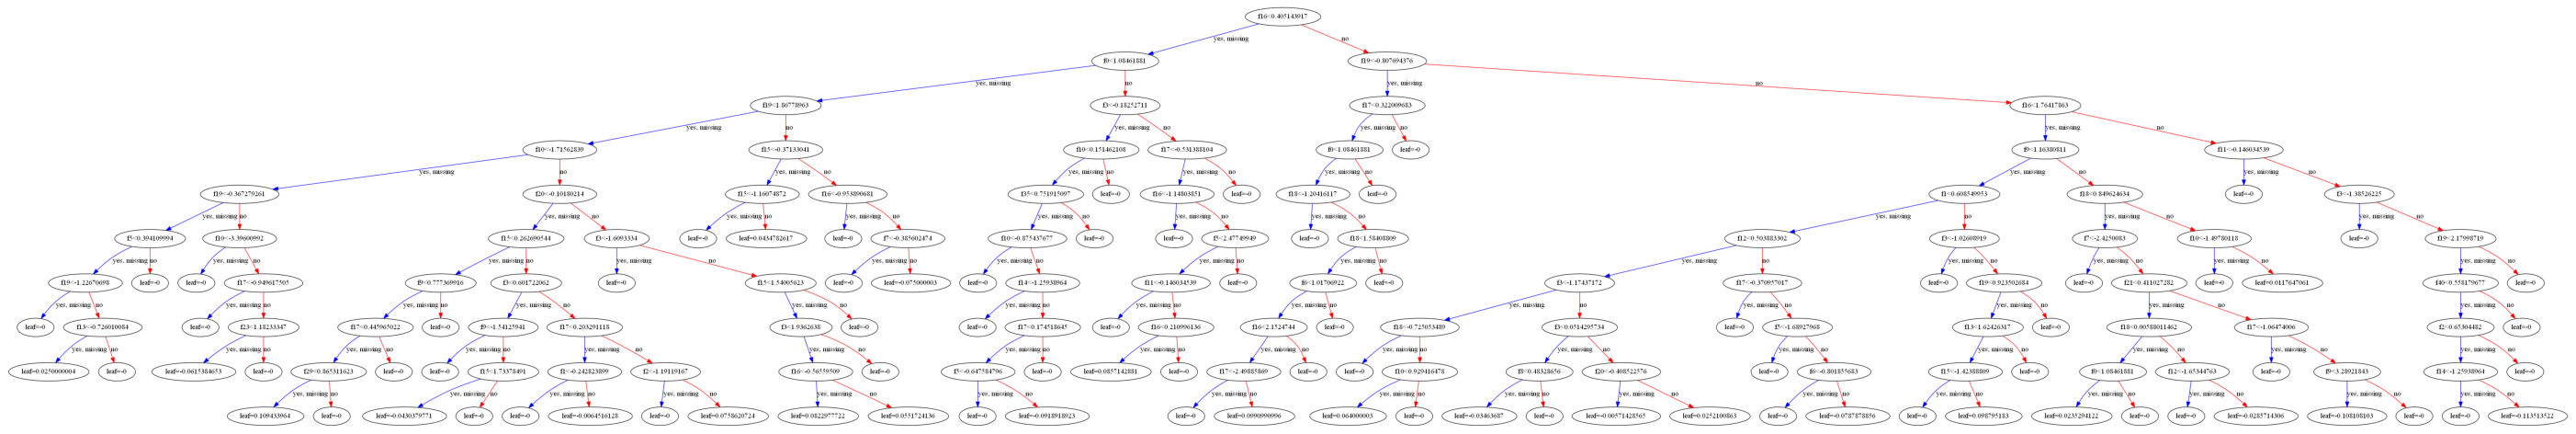

In [53]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 500]
plt.show()

##### Testing removing some features for XGboost

I wanted to do some testing on features selection and see wether removing some features will lead to better performance

In [37]:
''''B_fights_fought',
       'B_win_percent', 'B_loss_percent', 'R_fights_fought', 'R_win_percent',
       'R_loss_percent', 'diff_wins+percent', 'diff_loss_percent',
       'diff_fights_fought', 'days from current date'''

"'B_fights_fought',\n       'B_win_percent', 'B_loss_percent', 'R_fights_fought', 'R_win_percent',\n       'R_loss_percent', 'diff_wins+percent', 'diff_loss_percent',\n       'diff_fights_fought', 'days from current date"

In [83]:
temp_n_predictor_test = test[['diff_loss_percent','days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff','gender_MALE','better_rank_Red','better_rank_neither','diff_fights_fought','diff_wins+percent']]

temp_n_predictor_train = train[['diff_loss_percent','days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'gender_MALE','better_rank_Red','better_rank_neither','diff_fights_fought','diff_wins+percent']]

In [84]:
temp_n_predictor_test

,diff_loss_percent,days from current date,title_bout,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,weight_diff,win_by_decision_diff,gender_MALE,better_rank_Red,better_rank_neither,diff_fights_fought,diff_wins+percent
4085,-1.0,711,False,1,-2,0,1,4,14,0,0,0,0.00,-7.62,10,-1.24,-0.4,1.56,0,-1,1,0,1,-5,1.0
4086,-1.0,711,False,0,0,-1,1,5,0,0,4,0,-5.08,-7.62,5,-1.68,0.0,-0.40,0,3,1,1,0,-6,1.0
4087,0.0,711,False,0,-3,-3,-5,-4,-27,0,-2,0,-2.54,-5.08,-8,-3.88,0.0,-1.14,0,3,0,1,0,9,1.0
4088,1.0,704,False,3,-1,2,2,1,5,0,0,1,2.54,10.16,0,-0.07,0.2,-0.06,0,-1,1,0,1,-3,0.0
4089,0.0,704,False,0,0,0,0,0,0,0,0,0,-5.08,-7.62,-3,1.73,0.0,0.00,0,0,1,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4534,0.0,368,False,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.85,-1.6,-3.33,20,-8,1,0,1,-4,0.0
4535,0.0,368,False,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.19,0.3,-1.48,0,4,1,0,1,8,0.0
4536,0.0,368,False,-1,2,0,-2,-3,-12,0,-1,0,-5.08,5.08,-13,1.59,0.9,3.32,0,1,0,0,1,5,0.0
4537,-1.0,368,False,0,0,-2,-3,1,1,0,-3,0,7.62,-5.08,-1,-2.07,-0.1,2.97,0,0,1,0,1,2,1.0


In [92]:
xg_reg = xgb.XGBClassifier(learning_rate = 0.1,
                max_depth = 5,n_estimators = 2500, alpha=4)

pipe = make_pipeline(StandardScaler(), xg_reg)

pipe.fit(temp_n_predictor_train, target_train['Winner_Red'])

pipe.score(temp_n_predictor_test, target_test['Winner_Red'])

[22:54:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5916114790286976

Removing the features resulted in slightly worse performances. However less featues measns the model is less computationally expensive and it is less prone to overfitting, which in certain cases is favoured

#### SVM

In [54]:
from sklearn import svm

# baseline linear model

model = svm.SVC(kernel='linear')

pipe = make_pipeline(StandardScaler(), model)

pipe.fit(n_predictor_train, target_train['Winner_Red'])

pipe.score(n_predictor_test, target_test['Winner_Red'])

0.5783664459161147

In [ ]:

# poly model

model = svm.SVC(kernel='poly',degree=25)

pipe = make_pipeline(
    StandardScaler(), 
    model)

pipe.fit(n_predictor_train, target_train['Winner_Red'])

pipe.score(n_predictor_test, target_test['Winner_Red'])

0.5894039735099338

#### Perceptron

In [55]:


model = Perceptron()

pipe = make_pipeline(
    StandardScaler(), 
    model)

pipe.fit(n_predictor_train, target_train['Winner_Red'])

pipe.score(n_predictor_test, target_test['Winner_Red'])


0.5629139072847682

In [82]:
model = Perceptron(penalty='l2', alpha=0.01)

pipe = make_pipeline(
    StandardScaler(), 
    model)

pipe.fit(n_predictor_train, target_train['Winner_Red'])

pipe.score(n_predictor_test, target_test['Winner_Red'])

0.609271523178808

In [109]:
# model with less features

model = Perceptron(penalty='l2', alpha=0.009)

pipe = make_pipeline(
    StandardScaler(), 
    model)

pipe.fit(temp_n_predictor_train, target_train['Winner_Red'])

pipe.score(temp_n_predictor_test, target_test['Winner_Red'])

0.6048565121412803

#### Random Forrest

In [13]:
# split 90% of the fights

train_count=round(dt_df[['days from current date','Winner_Red']].groupby('days from current date').count().sum()[0]*0.9)+1

#train test split
train=dt_df.iloc[:train_count]

test=dt_df.iloc[train_count:]

#win_type

wintype_train=copy.deepcopy(train)

wintype_test=copy.deepcopy(test)

KeyError: "['Winner_Red'] not in index"

In [14]:
dt_df

,R_odds,B_odds,R_ev,B_ev,Winner,title_bout,weight_class,gender,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_Stance,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Stance,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,better_rank,finish,finish_round,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds,weight_diff,win_by_decision_diff,B_fights_fought,B_win_percent,B_loss_percent,R_fights_fought,R_win_percent,R_loss_percent,diff_wins+percent,diff_loss_percent,diff_fights_fought,days from current date
0,140.0,-160,140.000000,62.500000,Blue,False,Light Heavyweight,MALE,0,0,1,1,0,Orthodox,0,0,0,1,2,Orthodox,0,0,0,-1,2,-1,0,0,-2,-10.16,-10.16,-2,16.000000,-0.666667,0.833333,neither,U-DEC,3.0,NaN,NaN,NaN,NaN,NaN,NaN,-20,-1,3,1.0,0.0,6,0.0,0.0,-1.0,0.0,3,4615
1,215.0,-235,215.000000,42.553191,Blue,False,Light Heavyweight,MALE,0,0,2,0,1,Orthodox,0,0,2,4,1,Orthodox,0,0,-1,-4,3,-14,0,-4,0,2.54,20.32,10,8.272727,0.159091,1.954545,neither,KO/TKO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,25,0,4,1.0,0.0,11,1.0,0.0,0.0,0.0,7,4615
2,-250.0,230,40.000000,230.000000,Red,False,Heavyweight,MALE,0,0,0,5,2,Orthodox,0,0,0,4,0,Orthodox,0,-3,0,3,-3,10,1,1,2,-5.08,-2.54,-4,-12.050000,0.700000,1.200000,neither,KO/TKO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-4,0,10,1.0,0.0,4,1.0,0.0,0.0,0.0,-6,4615
3,-120.0,100,83.333333,100.000000,Red,False,Middleweight,MALE,0,0,0,3,0,Orthodox,0,1,1,3,0,Orthodox,-1,-2,0,-1,1,-5,0,0,0,5.08,7.62,-3,-15.550000,0.125000,-1.000000,neither,KO/TKO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,-20,2,8,0.0,0.0,10,0.0,0.0,0.0,0.0,2,4615
4,-420.0,335,23.809524,335.000000,Red,False,Welterweight,MALE,0,0,0,0,0,Orthodox,0,0,1,0,0,Orthodox,1,0,-1,-1,1,-6,0,0,0,10.16,7.62,-5,-40.500000,0.000000,-3.500000,neither,U-DEC,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0.0,0.0,2,0.0,0.0,0.0,0.0,2,4615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4534,110.0,-130,110.000000,76.923077,Blue,False,Middleweight,MALE,0,2,6,1,0,Southpaw,0,0,0,1,5,Orthodox,0,0,1,3,1,25,0,0,-5,-5.08,0.00,-2,-0.850000,-1.600000,-3.330000,neither,S-DEC,3.0,550.0,275.0,275.0,1400.0,600.0,185.0,20,-8,14,1.0,0.0,10,1.0,0.0,0.0,0.0,-4,402
4535,170.0,-200,170.000000,50.000000,Blue,False,Welterweight,MALE,0,0,0,4,2,Orthodox,0,1,3,4,3,Orthodox,0,0,-2,-5,-3,-20,0,0,-1,2.54,0.00,-1,2.190000,0.300000,-1.480000,neither,U-DEC,3.0,450.0,350.0,700.0,1100.0,550.0,120.0,0,4,11,1.0,0.0,19,1.0,0.0,0.0,0.0,8,402
4536,215.0,-265,215.000000,37.735849,Blue,False,Women's Flyweight,FEMALE,0,0,0,1,1,Orthodox,0,0,1,2,1,Southpaw,-1,2,0,-2,-3,-12,0,-1,0,-5.08,5.08,-13,1.590000,0.900000,3.320000,neither,KO/TKO,2.0,300.0,200.0,1600.0,330.0,1000.0,300.0,0,1,2,1.0,0.0,7,1.0,0.0,0.0,0.0,5,402
4537,-155.0,135,64.516129,135.000000,Blue,False,Lightweight,MALE,0,0,0,1,0,Orthodox,0,0,0,4,0,Orthodox,0,0,-2,-3,1,1,0,-3,0,7.62,-5.08,-1,-2.070000,-0.100000,2.970000,neither,KO/TKO,2.0,330.0,450.0,2000.0,900.0,140.0,330.0,0,0,3,0.0,1.0,5,1.0,0.0,1.0,-1.0,2,402


### Type of Win prediction

In [306]:
wintype_train[['finish']].head()

,finish
0,U-DEC
1,KO/TKO
2,KO/TKO
3,KO/TKO
4,U-DEC


In [307]:
wintype_predictor_train.head()

,B_win_by_Decision_Unanimous,B_win_by_Decision_Split,B_win_by_Decision_Majority,B_win_by_Submission,B_win_by_KO/TKO,diff_loss_percent,diff_fights_fought,diff_wins+percent,days from current date,title_bout,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,weight_diff,win_by_decision_diff,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,gender_MALE,B_Stance_Southpaw,B_Stance_Switch,B_Stance_Switch,R_Stance_Orthodox,R_Stance_Southpaw,better_rank_Red,better_rank_neither
0,1,0,0,0,1,0.0,3,-1.0,4584,False,0,0,0,-1,2,-1,0,0,-2,-10.16,-10.16,-2,16.000000,-0.666667,0.833333,-20,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,2,0,0,1,0,0.0,7,0.0,4584,False,0,0,-1,-4,3,-14,0,-4,0,2.54,20.32,10,8.272727,0.159091,1.954545,25,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,0,0,0,2,5,0.0,-6,0.0,4584,False,0,-3,0,3,-3,10,1,1,2,-5.08,-2.54,-4,-12.050000,0.700000,1.200000,-4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,0,0,0,0,3,0.0,2,0.0,4584,False,-1,-2,0,-1,1,-5,0,0,0,5.08,7.62,-3,-15.550000,0.125000,-1.000000,-20,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0,0,0,0,0,0.0,2,0.0,4584,False,1,0,-1,-1,1,-6,0,0,0,10.16,7.62,-5,-40.500000,0.000000,-3.500000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1


##### Baseline - Logistic Regression

In [274]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(C=0.5))

pipe.fit(wintype_predictor_train, wintype_train['finish'])

pipe.score(wintype_predictor_test, wintype_test['finish'])

0.423841059602649

##### xgboost

In [287]:
xg_reg = xgb.XGBClassifier(learning_rate = 0.01)

pipe = make_pipeline(StandardScaler(), xg_reg)

pipe.fit(wintype_predictor_train, wintype_train['finish'])

pipe.score(wintype_predictor_test, wintype_test['finish'])

[15:05:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.4260485651214128

##### Perceptron 

In [302]:
model = Perceptron(penalty='l2', alpha=0.1)

pipe = make_pipeline(
    StandardScaler(), 
    model)

pipe.fit(wintype_predictor_train, wintype_train['finish'])

pipe.score(wintype_predictor_test, wintype_test['finish'])

0.40397350993377484

### Rounds 

In [ ]:
# train test split


#dropna
temp = b_df.dropna(subset=['finish_round'])

#train test

test = temp[(temp['days from current date'] < 800)]

train = temp[(temp['days from current date'] > 800)]

# X/Y

X_test = test[['days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw']]

X_train = train[['days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw']]




In [ ]:
target_test

,finish_round,Winner_Red,finish_M-DEC,finish_S-DEC,finish_SUB,finish_U-DEC
4085,NaN,1,0,0,1,0
4086,NaN,1,0,0,0,0
4087,NaN,1,0,0,1,0
4088,NaN,1,0,0,0,0
4089,NaN,0,0,0,1,0
...,...,...,...,...,...,...
4534,3.0,0,0,1,0,0
4535,3.0,0,0,0,0,1
4536,2.0,0,0,0,0,0
4537,2.0,0,0,0,0,0


In [ ]:
# model

pipe = make_pipeline(StandardScaler(), linear_model.Lasso(alpha=0.1))

pipe.fit(X_train, train['finish_round'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1))])

In [ ]:
pipe.score(X_test, test['finish_round'])

0.02287253327504224

# Random stuff

In [ ]:
train.columns

Index(['R_odds', 'B_odds', 'R_ev', 'B_ev', 'title_bout', 'lose_streak_dif',
       'win_streak_dif', 'longest_win_streak_dif', 'win_dif', 'loss_dif',
       'total_round_dif', 'total_title_bout_dif', 'ko_dif', 'sub_dif',
       'height_dif', 'reach_dif', 'age_dif', 'sig_str_dif', 'avg_sub_att_dif',
       'avg_td_dif', 'finish_round', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds',
       'b_sub_odds', 'r_ko_odds', 'b_ko_odds', 'weight_diff',
       'win_by_decision_diff', 'B_fights_fought', 'B_win_percent',
       'B_loss_percent', 'R_fights_fought', 'R_win_percent', 'R_loss_percent',
       'diff_wins+percent', 'diff_loss_percent', 'diff_fights_fought',
       'days from current date', 'Winner_Red', 'weight_class_Catch Weight',
       'weight_class_Featherweight', 'weight_class_Flyweight',
       'weight_class_Heavyweight', 'weight_class_Light Heavyweight',
       'weight_class_Lightweight', 'weight_class_Middleweight',
       'weight_class_Welterweight', 'weight_class_Women's Bantamweight

In [ ]:
# odds 

'R_odds', 'B_odds', 'R_ev', 'B_ev', 'r_dec_odds', 'b_dec_odds', 'r_sub_odds', 'b_sub_odds', 'r_ko_odds', 'b_ko_odds',



('R_odds',
 'B_odds',
 'R_ev',
 'B_ev',
 'r_dec_odds',
 'b_dec_odds',
 'r_sub_odds',
 'b_sub_odds',
 'r_ko_odds',
 'b_ko_odds')

In [ ]:
# should maybe drop this

b_df[['total_title_bout_dif']].describe()

,total_title_bout_dif
count,4538.000000
mean,-0.274350
std,1.492279
min,-14.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,14.000000


In [ ]:
# shouldn't drop this one as there is a mena and all 


b_df[['total_round_dif']].describe()

,total_round_dif
count,4538.000000
mean,-5.088585
std,16.440999
min,-448.000000
25%,-11.000000
50%,-3.000000
75%,2.000000
max,80.000000


In [118]:
data = copy.deepcopy(b_df)

train test split

In [119]:
train_count=round(data[['days from current date','Winner_Red']].groupby('days from current date').count().sum()[0]*0.9)+1

#train test split
train=data.iloc[:train_count]

test=data.iloc[train_count:]

In [120]:
X_test = test[['diff_loss_percent','diff_fights_fought','diff_wins+percent','days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw','better_rank_Red','better_rank_neither',]]

y_test = test[['Winner_Red']]

X_train = train[['diff_loss_percent','diff_fights_fought','diff_wins+percent','days from current date', 'title_bout',
       'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif',
       'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif',
       'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif',
       'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif',
       'weight_diff', 'win_by_decision_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Welterweight',
       'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'gender_MALE', 'B_Stance_Southpaw',
       'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox',
       'R_Stance_Southpaw','better_rank_Red','better_rank_neither',]]

y_train = train[['Winner_Red']]

In [121]:
# scale data

scale = StandardScaler()

scale.fit_transform(X_train)

scale.fit_transform(X_test)



array([[-1.85185625, -0.95903596,  1.49750576, ..., -0.50826502,
        -0.62415587,  0.63783407],
       [-1.85185625, -1.0798825 ,  1.49750576, ..., -0.50826502,
         1.60216389, -1.56780588],
       [ 0.12200465,  0.73281552,  1.49750576, ..., -0.50826502,
         1.60216389, -1.56780588],
       ...,
       [ 0.12200465,  0.24942938, -0.24637627, ...,  1.96747751,
        -0.62415587,  0.63783407],
       [-1.85185625, -0.11311022,  1.49750576, ..., -0.50826502,
        -0.62415587,  0.63783407],
       [ 0.12200465,  1.33704819, -0.24637627, ..., -0.50826502,
         1.60216389, -1.56780588]])

pca

In [108]:
# data copy

df = copy.deepcopy(X_train)
y = copy.deepcopy(y_train)

In [124]:
# Visualize our data
colors = px.colors.sequential.Plasma
colors[0], colors[1], colors[2] = ['red', 'green', 'blue']
fig = px.scatter_3d(X_train, x='x0', y='x1', z='x2', color=y_train.astype(str), color_discrete_sequence=colors, height=500, width=1000)
fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black', 
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['diff_loss_percent', 'diff_fights_fought', 'diff_wins+percent', 'days from current date', 'title_bout', 'lose_streak_dif', 'win_streak_dif', 'longest_win_streak_dif', 'win_dif', 'loss_dif', 'total_round_dif', 'total_title_bout_dif', 'ko_dif', 'sub_dif', 'height_dif', 'reach_dif', 'age_dif', 'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif', 'weight_diff', 'win_by_decision_diff', 'weight_class_Catch Weight', 'weight_class_Featherweight', 'weight_class_Flyweight', 'weight_class_Heavyweight', 'weight_class_Light Heavyweight', 'weight_class_Lightweight', 'weight_class_Middleweight', 'weight_class_Welterweight', "weight_class_Women's Bantamweight", "weight_class_Women's Featherweight", "weight_class_Women's Flyweight", "weight_class_Women's Strawweight", 'gender_MALE', 'B_Stance_Southpaw', 'B_Stance_Switch', 'B_Stance_Switch ', 'R_Stance_Orthodox', 'R_Stance_Southpaw', 'better_rank_Red', 'better_rank_neither'] but received: x0

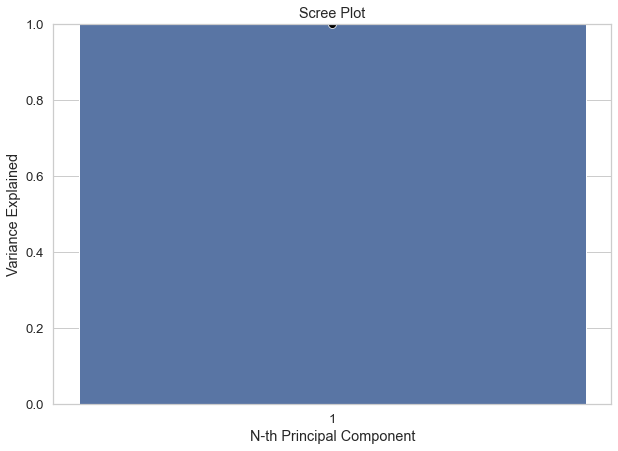

In [126]:
# Perform PCA (w/o limits on n_components)
pca = PCA()
_ = pca.fit_transform(y_test)
PC_components = np.arange(pca.n_components_) + 1

# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

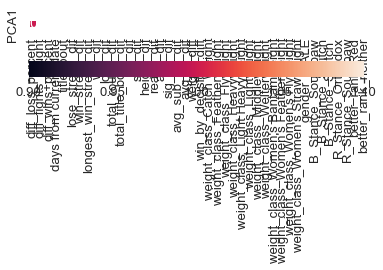

In [127]:
# Feature Weight
_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(X_train.columns),
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

In [128]:
# Perform PCA (Choose n_components to keep)
pca = PCA(n_components=20)
pca_array = pca.fit_transform(X_train)

# Convert back to DataFrame for readability
df_pca = pd.DataFrame(data=pca_array)
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca['label'] = y_train

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,label
0,2143.102267,22.760061,2.160645,4.673024,24.176637,2.375436,-4.394637,-1.221707,-2.354499,-0.672313,1.217941,0.223951,-0.392467,0.169754,-0.454147,0.291360,0.234986,-0.498335,-0.495256,-0.086404,0
1,2143.103812,11.750489,16.270729,-7.730757,-30.003692,-6.415590,-9.491367,-1.211619,0.043793,3.491397,0.637395,0.373587,-0.432119,1.267677,-0.046568,-0.226981,0.172000,-0.025299,-0.282475,-0.393219,0
2,2143.146646,-2.318021,-17.171263,1.910900,5.947474,4.036170,-2.426139,3.078568,2.424291,0.761112,-1.042534,0.368172,-2.436046,0.746351,0.154323,0.996305,-0.125033,0.298356,-0.078974,-0.348313,1
3,2143.134580,-9.255448,0.256858,-16.410221,15.535398,4.479076,-0.070362,-0.362421,-0.153541,-1.236575,-1.054529,0.301586,-1.240235,1.147293,-1.316220,-0.355024,-0.035766,-0.292160,-0.255761,-0.161531,1
4,2143.165395,-33.993584,-3.847434,-10.959230,-3.542989,4.832436,5.518266,-0.887024,-1.207664,-1.826280,-0.631029,0.300573,1.785885,0.691027,0.428592,0.464554,-0.391358,0.173165,-0.027512,-0.297825,1


In [160]:
model = xgb.XGBClassifier(learning_rate = 0.001,
                max_depth = 9,n_estimators = 2500, alpha=5)

pca = PCA(n_components=35)

scale = StandardScaler()

pipe = make_pipeline(scale, pca, model)

pipe.fit(n_predictor_train, target_train['Winner_Red'])

pipe.score(n_predictor_test, target_test['Winner_Red'])

[00:22:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5761589403973509

In [174]:
model = Perceptron(penalty='l2', alpha=0.01)

pca = PCA(n_components=41)

scale = StandardScaler()

pipe = make_pipeline(scale, pca, model)

pipe.fit(n_predictor_train, target_train['Winner_Red'])

pipe.score(n_predictor_test, target_test['Winner_Red'])

0.609271523178808

In [164]:
model = Perceptron(penalty='l2', alpha=0.01)

pca = PCA(n_components=35)

scale = StandardScaler()

pipe = make_pipeline(scale, pca, model)

pipe.fit(n_predictor_train, target_train['Winner_Red'])

pipe.score(n_predictor_test, target_test['Winner_Red'])

0.5717439293598234

In [16]:
df

NameError: name 'data' is not defined